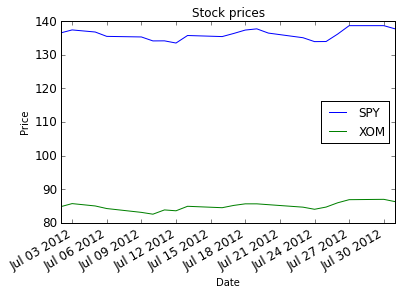

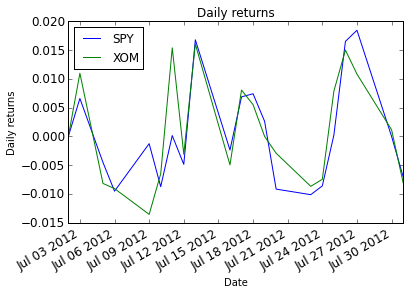

In [30]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.ioff()

filepath = '../ml4t/data'

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol, filepath), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    for symbol in df.columns:
        for i in range(df.shape[0]-1,0,-1):
            df.loc[df.index[i],symbol] = (df.loc[df.index[i],symbol] / df.loc[df.index[i-1],symbol]) - 1
        df.loc[df.index[0],symbol] = 0
    return df

# def test_run():
# Read data
dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY','XOM']
df = get_data(symbols, dates)
plot_data(df)

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


# if __name__ == "__main__":
#     test_run()


In [40]:
df.head()

,SPY,XOM
2012-07-02,0.000000,0.000000
2012-07-03,0.006593,0.010968
2012-07-05,-0.004512,-0.008166
2012-07-06,-0.009504,-0.009057
2012-07-09,-0.001255,-0.013531


In [42]:
df.shift(1).head()

,SPY,XOM
2012-07-02,NaN,NaN
2012-07-03,0.000000,0.000000
2012-07-05,0.006593,0.010968
2012-07-06,-0.004512,-0.008166
2012-07-09,-0.009504,-0.009057
